# <font color = 'red'> ЛР 8. Кластеризация </font>

Сложность: <font color = 'Red'> Сложно  </font>.

Дата составления: 1.12.2023

Срок выполнения: 2 неделb (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Постановка задачи кластеризации </font>

Пусть задана обучающая выборка из некоторого множества объектов $X\in X_{all}$ $X = (\overline{x_1}, \overline{x_2},..., \overline{x_n}), \overline{x_i} \in \mathbb{R}^{m}$.

Задача **кластеризации** состоит в поиске обощённой функции или алгоритма $\alpha$ такой что: $\alpha:X_{all} \rightarrow Y$ или $\alpha(\overline x_{i}) = y_{i}$ для $\overline{x_i} \in X$. $Y$ - множество дискретных меток.

Алгоритмы кластеризации относят к классу *методов обучения без учителя* потому, что множество меток не известно заранее и формируется по ходу на основе обучающей выборки.

Множество $X_{cl}$ называют **кластером**, если $\forall \quad \overline{x} \in X_{cl}  \quad  \alpha(\overline{x}) = const = cl $.

## <font color = 'green'> 2. Обзор некоторых методов кластеризации  </font>

### Метод k-средних

Алгоритм **k-средних** - один из самых популярных и используемых методов кластеризации. Идея метода заключается в итеративном нахождении центров кластеров. 

Алгоритм требует изначального задания количества кластеров.

Кратко работу алгоритма можно описать так.

1. Задаём количество кластеров $k$.
2. Задаём случайные центры кластеров, которые назовём центроидами $C_{0} = (\overline{\mu_1}, \overline{\mu_2},..., \overline{\mu_k})$.
3. Кластеризуем данные из обучающей выборке, преисывая каждый сэмпл к ближ. кластеру (по некоторой метрике в $\mathbb{R}^{m}$). 
4. Далее сдвигаем положения центроидов в геометрический центр получившихся в п.3 кластеров. 
5. Проверяем условие выхода. Как правило суммарное расстояние между новыми и старыми центроидами ограничивают некторым малым значением $\epsilon$. В случае если условие выполнено, то возвращаем полученные центроиды кластеров. Если нет, возвращаемся к пункту 3.

Кластер для каждого объекта теперь определяется ближайшим к нему центроидом.

[Подробнее](https://en.wikipedia.org/wiki/K-means_clustering)

### DBSCAN

Алгоритм **DBSCAN** относится к плотностным алгоритмам кластеризации. Он предполагает специальный обход точек из обучающей выборки с последовательным их объединением в кластеры.

Общая идея работы алгоритма описывается следующим образом.

Точкой далее будем называть представителя пространства $\mathbb{R}^{m}$.
Также для работы алгоритма задают два важных гиперпараметра: точность $\epsilon$ и плотность $k$.

1. Точку $p$ будем называть **корневой** если в её $\epsilon$ - откретсности находится не менее $k$ точек.
2. Точка $q$ **прямо достижима** из $p$ если $p$-корневая точка, а расстояние $d(p,q)<\epsilon$. То есть точка $q$ в $\epsilon$ - откретсности $p$. Обозначим $p\rightarrow q$.
3. Точка $q$ **достижима** из $p$, если существует последовательность точек $p = p_{1}\rightarrow p_{2} \rightarrow p_{3}  \rightarrow ... \rightarrow p_{k} \rightarrow q $. Каждая точка $ p_{i}$ - корневая.

Кластер формирует любая корневая точка вместе со всеми точками (корневыми и нет) достижимыми из неё.

Для симметричности часто вводят понятие **плотностной связности**. Две точки $p$ и $q$ называют *плотностно связанными*, если существует корневая точка $c$ такая что $p$ достижима из $c$ и $q$ достижима из $c$. Очивидно, что в данных терминах кластер - множество попарно *плотностно связаннымых* точек.

Реализация предполагает последовательный обход точек с формированием кластеров, согласно определениям выше. Точки, не попавшие не в один кластер (подумайте, откуда такие возьмутся?) кластризуются как шум. Алгоритм **DBSCAN** отлично показывает себя на обучающих данных различной формы.

[Подробнее](https://habr.com/ru/articles/322034/)

In [1]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_classification, make_blobs, make_moons, make_circles, make_swiss_roll
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore") 

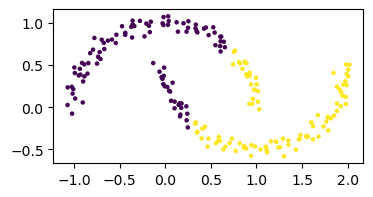

In [3]:
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=5, cmap='viridis');

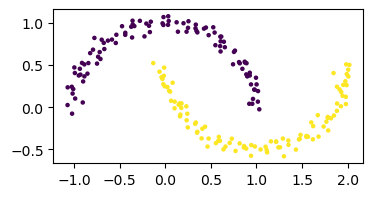

In [4]:
model = DBSCAN(eps=0.2,min_samples=5)
model.fit(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
            s=5, cmap='viridis');

### Иерархическая агломеративная кластеризация.

Идея агломеративной кластеризации следующая.

1. Кластер формируется в каждой точке данных.
2. Далее кластеры попарно объединяются по принципу близости (к примеру минимальное расстояние между точками кластера).
3. Процесс продолжается пока данные не объединятся в один кластер.

Остановив процесс слияния на нужном этапе получим  кластеризацию на необходимое количество кластеров. 

[Подробнее](https://neerc.ifmo.ru/wiki/index.php?title=%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F)

## <font color = 'green'> 3. Задания </font>

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте самостоятельно, описанные алгоритмы кластеризации.
2. Сравните результаты работы со встроенными методами. Графически интерпретируйте результаты.
3. Дайте аргументированные ответы о скорости и эффективности работы на различных искусственных данных для реализованных и встроенных алгоритмов.
4. Оцените качество кластеризации используя различные методы (ARI, силуэт и др). [Подробнее](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)
5. Изучте ещё 3 любых метода кластеризации и приведите сравнительную характеристику работы 6 алгоритмов кластеризации по проивзодительности на различных данных.*

## Реализация k-means

In [17]:
from scipy.spatial import distance
import matplotlib.pyplot as plt

def initialize_centers(X, k):
    return X[np.random.choice(len(X), size=k, replace=False)]

def assign_clusters(X, centers):
    clusters = {key: [] for key in range(len(centers))}
    cluster_labels = []

    for point in X:
        distances = [distance.euclidean(point, center) for center in centers]
        best_cluster = np.argmin(distances)

        clusters[best_cluster].append(point)
        cluster_labels.append(best_cluster)

    return clusters, cluster_labels

def reevaluate_centers(clusters):
    return np.array([np.mean(clusters[key], axis=0) for key in clusters])

def kmeans(X, k, early_stop=0.1, plot=False):
    centers = initialize_centers(X, k)
    eps = float("inf")

    while eps >= early_stop:
        clusters, cluster_labels = assign_clusters(X, centers)
        new_centers = reevaluate_centers(clusters)
        eps = np.sum([distance.euclidean(centers[index], new_centers[index]) for index, _ in enumerate(centers)])
        centers = new_centers

    if plot:
        cluster_plot(clusters)

    return cluster_labels

def cluster_plot(clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, key in enumerate(clusters):
        cluster_points = np.array(clusters[key])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {key}')

    plt.title('К средних')
    plt.legend()
    plt.show()

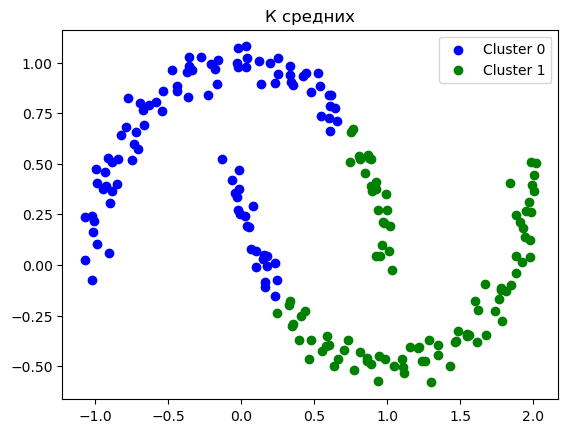

In [18]:
kmeans_labels_own = kmeans(X, k=2, early_stop=0.1, plot=True)

In [19]:
from sklearn import metrics

def evaluate_clustering(X, y, labels, print_metrics=True):
    silhouette_score = metrics.silhouette_score(X, labels)
    adjusted_rand_score = metrics.adjusted_rand_score(y, labels)
    v_measure_score = metrics.v_measure_score(y, labels)
    
    if print_metrics:
        print(f"Silhouette Score: {silhouette_score:.3f}")
        print(f"Adjusted Rand Score: {adjusted_rand_score:.3f}")
        print(f"V Measure Score: {v_measure_score:.3f}")
    
    return {"Silhouette Score": silhouette_score, 
            "Adjusted Rand Score": adjusted_rand_score, 
            "V Measure Score": v_measure_score}

def visualize_clustering(X, labels):
    plt.figure(figsize=(4, 2))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
    plt.title('Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def run_clustering_algorithm(algorithm, X, y):
    labels = algorithm.fit_predict(X)
    evaluate_clustering(X, y, labels)
    visualize_clustering(X, labels)


In [20]:
print("Мои результаты")
_ = evaluate_clustering(X, y, kmeans_labels_own, print_metrics=True)

Мои результаты
Silhouette Score: 0.493
Adjusted Rand Score: 0.267
V Measure Score: 0.205


Результаты sklearn
Silhouette Score: 0.492
Adjusted Rand Score: 0.256
V Measure Score: 0.197


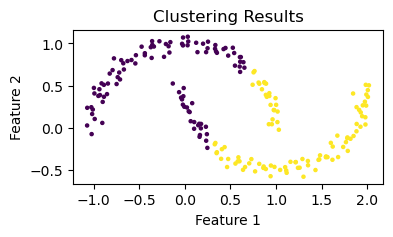

In [22]:
print("Результаты sklearn")
_ = run_clustering_algorithm(KMeans(n_clusters=2), X, y)

In [28]:
%timeit cluster_labels = kmeans(X, k=2)

129 ms ± 54.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%timeit cluster_labels = KMeans(n_clusters=2).fit_predict(X)

46.3 ms ± 3.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Реализация DBSCAN

In [30]:
def find_neighbors(dataset, n_index, eps=0.2):
    neighbors = []
    for point_index in range(len(dataset)):
        if point_index == n_index:
            continue
            
        if distance.euclidean(dataset[point_index], dataset[n_index]) < eps:
            neighbors.append(point_index)
            
    return neighbors

def grow_cluster(dataset, labels, point_index, neighbors, curr_cluster, eps=0.2, min_samples=5):
    labels[point_index] = curr_cluster
    
    i = 0
    while i < len(neighbors):    
        neighbor_index = neighbors[i]
       
        if labels[neighbor_index] == -1:
            labels[neighbor_index] = curr_cluster
        
        elif labels[neighbor_index] == 0:
            labels[neighbor_index] = curr_cluster
            neighbor_neighbors = find_neighbors(dataset, neighbor_index, eps)
            
            if len(neighbor_neighbors) >= min_samples:
                neighbors.extend(neighbor_neighbors)           
        
        i += 1

def dbscan(dataset, eps=0.2, min_samples=5):
    #    -1 - выброс
    #     0 - не размечено
    labels = [0] * len(dataset)
    curr_cluster = 0

    for point_index in range(len(dataset)):
        if not (labels[point_index] == 0):
            continue
        
        point_neighbors = find_neighbors(dataset, point_index, eps)
        
        if len(point_neighbors) < min_samples:
            labels[point_index] = -1

        else: 
            curr_cluster += 1
            grow_cluster(dataset, labels, point_index, point_neighbors, curr_cluster, eps, min_samples)
    
    labels = [label-1 for label in labels]
    return labels

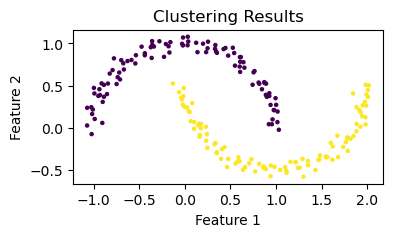

In [33]:
labels_dbscan = dbscan(X, eps=0.3)
visualize_clustering(X, labels_dbscan)

In [34]:
print("Мои результаты")
_ = evaluate_clustering(X, y, labels_dbscan, print_metrics=True)

Мои результаты
Silhouette Score: 0.326
Adjusted Rand Score: 1.000
V Measure Score: 1.000


In [61]:
from sklearn.cluster import DBSCAN

Результаты sklearn
Silhouette Score: 0.326
Adjusted Rand Score: 1.000
V Measure Score: 1.000


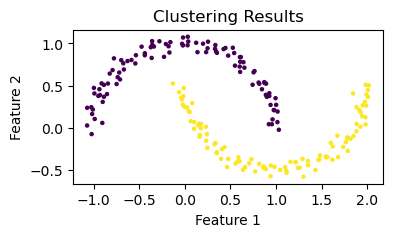

In [60]:
print("Результаты sklearn")
run_clustering_algorithm(DBSCAN(eps=0.3, min_samples=5), X, y)

In [38]:
%timeit labels_dbscan = dbscan(X)

438 ms ± 24.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%timeit cluster_labels = DBSCAN(eps=0.3, min_samples=5).fit(X)

1.6 ms ± 277 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Реализация агломеративной кластеризации

In [44]:
def linkage(cluster1, cluster2):
    return np.mean([distance.euclidean(point1, point2) for point1 in cluster1 for point2 in cluster2])

def hierarchical(data, k):
    clusters = [[point] for point in data]
    label_indices = [[i] for i in range(len(data))]
              
    while len(clusters) > k:
        distances = [(i, j, linkage(clusters[i], clusters[j])) 
                     for i in range(len(clusters)) for j in range(i+1, len(clusters))]
        i, j, _ = min(distances, key=lambda x: x[2])

        clusters[i] = clusters[i] + clusters[j]
        clusters.pop(j)
        
        label_indices[i].extend(label_indices[j])
        label_indices.pop(j)
    
    labels = [None for i in range(len(data))]
    for cluster_num, index_list in enumerate(label_indices):
        for index in index_list:
            labels[index] = cluster_num
        
    return labels

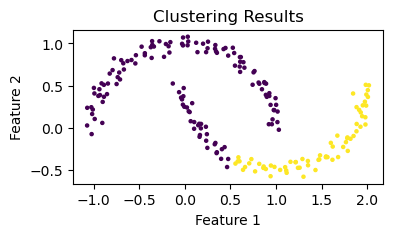

In [43]:
labels_hierarchical = hierarchical(X, k=2)
visualize_clustering(X, labels_hierarchical)

In [45]:
print("Мои результаты")
_ = evaluate_clustering(X, y, labels_hierarchical, print_metrics=True)

Мои результаты
Silhouette Score: 0.445
Adjusted Rand Score: 0.433
V Measure Score: 0.473


In [64]:
from sklearn.cluster import AgglomerativeClustering

Результаты sklearn
Silhouette Score: 0.445
Adjusted Rand Score: 0.433
V Measure Score: 0.473


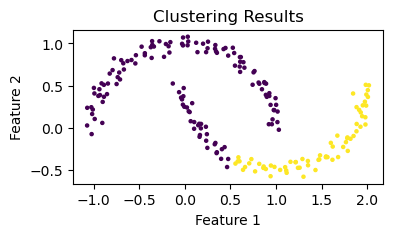

In [63]:
print("Результаты sklearn")
run_clustering_algorithm(AgglomerativeClustering(n_clusters=2), X, y)

In [50]:
%timeit cluster_labels = hierarchical(X, k=2)

47.3 s ± 1.88 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
%timeit cluster_labels = AgglomerativeClustering(n_clusters=2).fit_predict(X)

770 µs ± 49.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Gaussian Mixture Model (GMM)

https://scikit-learn.org/stable/modules/mixture.html

In [66]:
from sklearn.mixture import GaussianMixture

Silhouette Score: 0.460
Adjusted Rand Score: 0.516
V Measure Score: 0.416


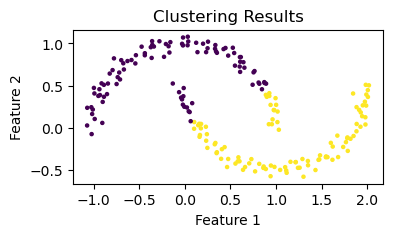

In [65]:
run_clustering_algorithm(GaussianMixture(n_components=2), X, y)

In [55]:
%timeit cluster_labels = GaussianMixture(n_components=2).fit_predict(X)

2.92 ms ± 48.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Birch

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html#sklearn.cluster.Birch

In [67]:
from sklearn.cluster import Birch

Silhouette Score: 0.449
Adjusted Rand Score: 0.433
V Measure Score: 0.444


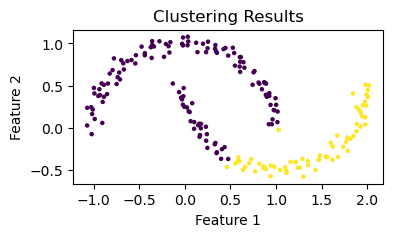

In [68]:
run_clustering_algorithm(Birch(n_clusters=2), X, y)

In [69]:
%timeit cluster_labels = Birch(n_clusters=2).fit_predict(X)

3.82 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## AffinityPropagation

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation

In [70]:
from sklearn.cluster import AffinityPropagation

Silhouette Score: 0.493
Adjusted Rand Score: 0.267
V Measure Score: 0.205


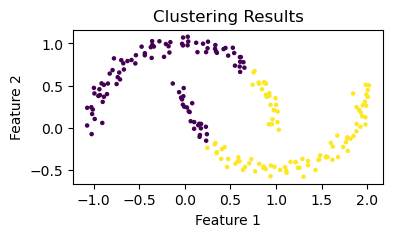

In [73]:
run_clustering_algorithm(AffinityPropagation(damping=0.9, preference=-50), X, y)

In [74]:
%timeit cluster_labels = AffinityPropagation(damping=0.9, preference=-50).fit_predict(X)

80.9 ms ± 5.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [108]:
X_blobs, y_blobs = make_blobs(n_samples=200, n_features=2)
X_moons, y_moons = make_moons(n_samples=200, noise=0.05)
X_circles, y_circles = make_circles(n_samples=200, noise=0.05, factor=0.5)

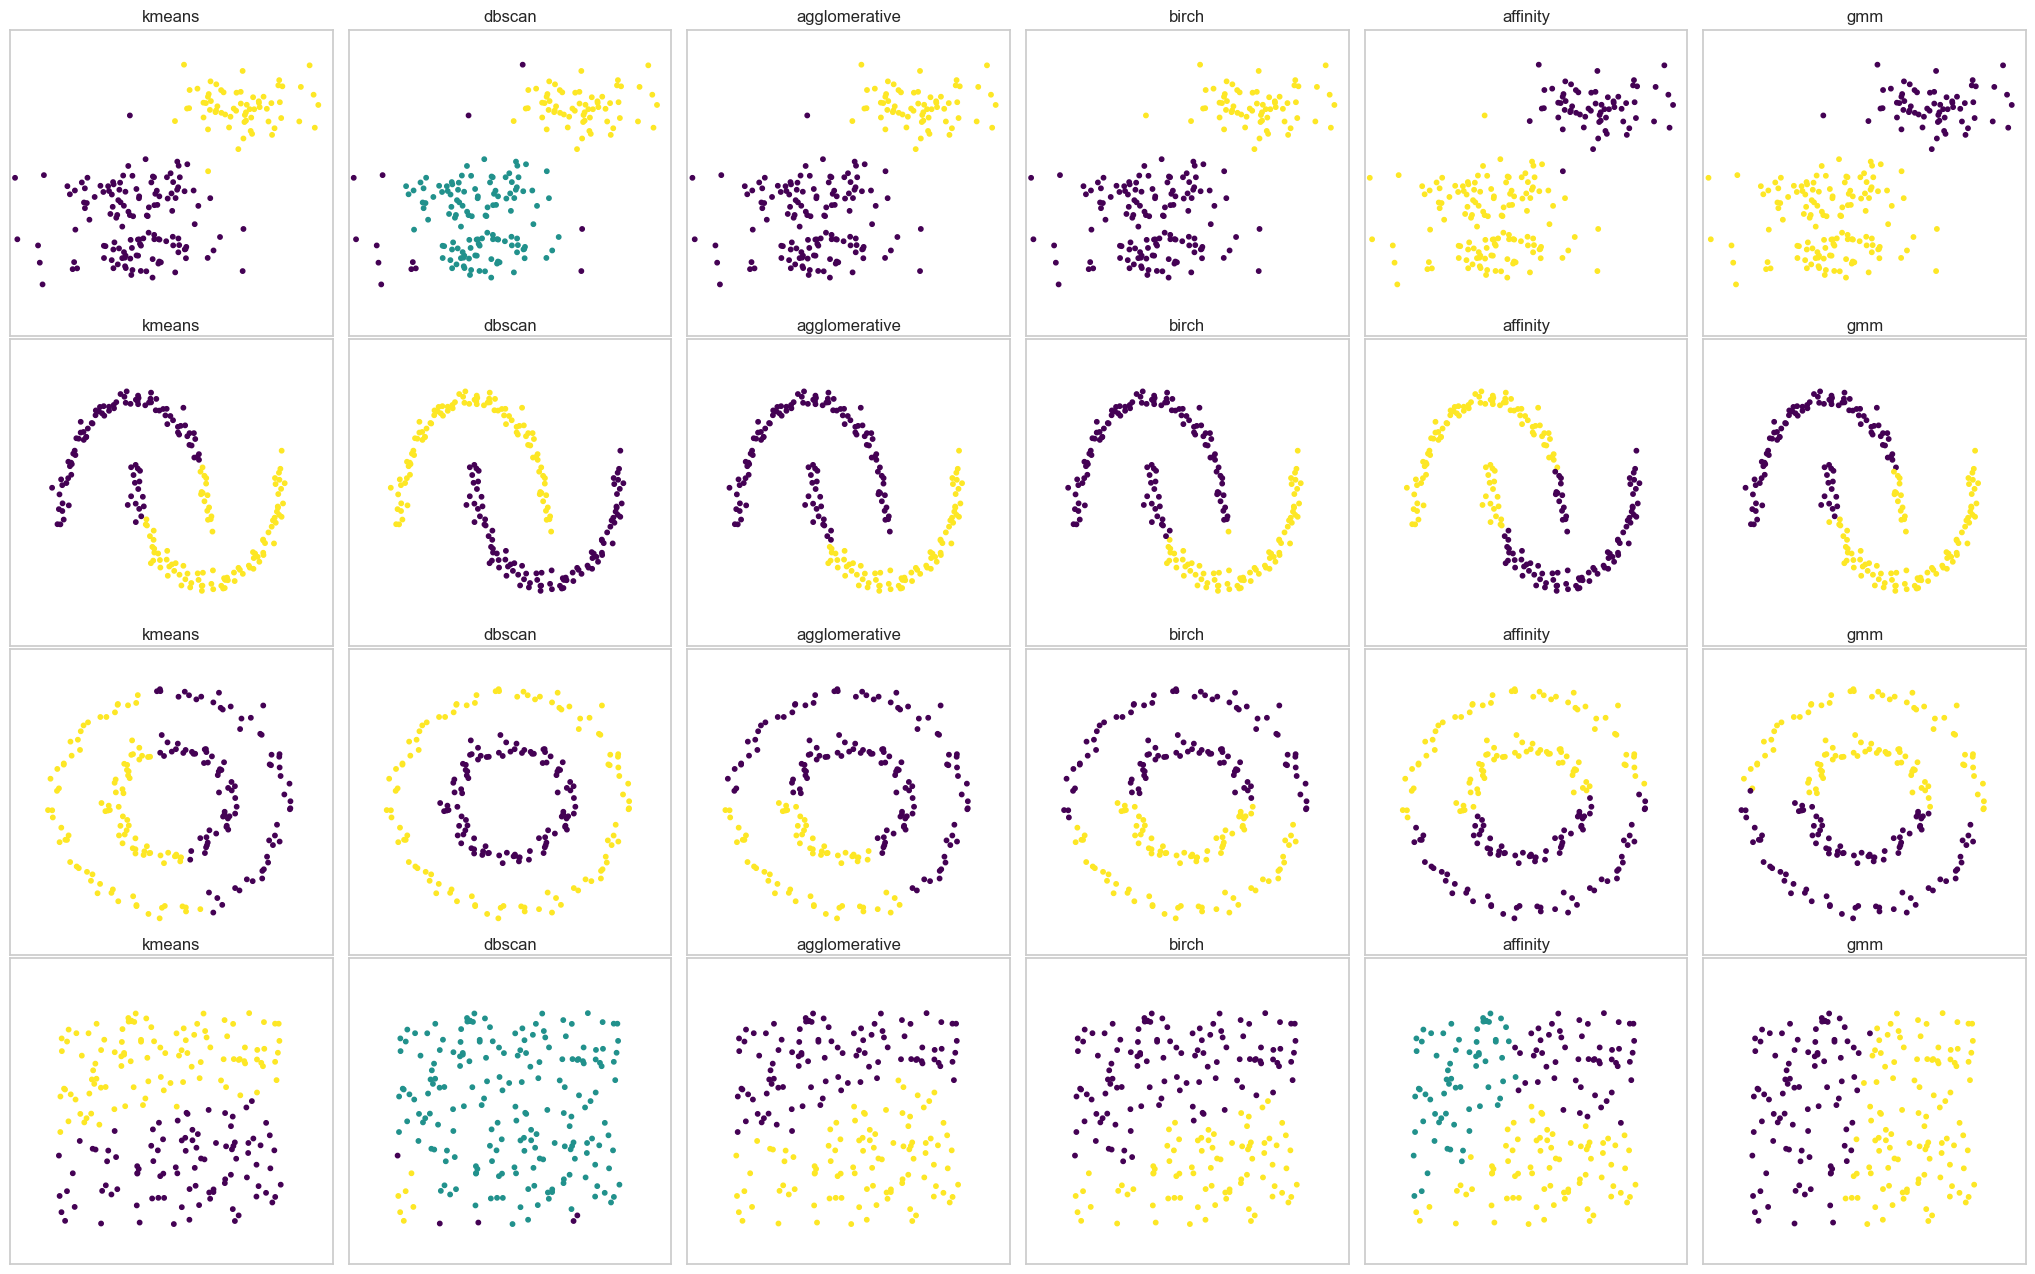

In [117]:
datasets = ((X_blobs, y_blobs),
            (X_moons, y_moons),
            (X_circles, y_circles),
            (np.random.rand(200, 2), None))

def visualize_clustering(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], s=10, c=labels, cmap='viridis')
    plt.title(title)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())

n_clusters = 2
random_state = 0
plot_num = 1

plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)


for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    algorithms = (("kmeans", KMeans(n_clusters=2)),
                  ("dbscan", DBSCAN(eps=0.4, min_samples=5)),
                  ('agglomerative',AgglomerativeClustering(n_clusters=2)),
                  ("birch", Birch(n_clusters=2)),
                  ("affinity", AffinityPropagation(damping=0.8, preference=-90)),
                  ('gmm',GaussianMixture(n_components=2)))
                   
    for name, algorithm in algorithms:
        plt.subplot(len(datasets), len(algorithms), plot_num)
        
        if i_dataset == 0:
            plt.title(name, size=18)
        y_pred = algorithm.fit_predict(X) if algorithm is not None else y
            
        visualize_clustering(X, y_pred, f"{name}")
        
        plot_num += 1

plt.show()


<font color = 'red' size = 5>Задание 2 </font>

1. Примените изученные методы кластеризации для указанных ниже данных.
2. Приведите различные оценки качества для моделей.
3. Предложите методики для определения оптимальных гиперпараметров моделей.
4. Дайте аргументированные ответы о применимости того или иного алгоритма на различных данных.

[Датасет 1](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

[Датасет 2](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering/code)

[Датасет 3](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [165]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Dataset 1

In [123]:
df_1 = pd.read_csv("wine-clustering.csv")
df_1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


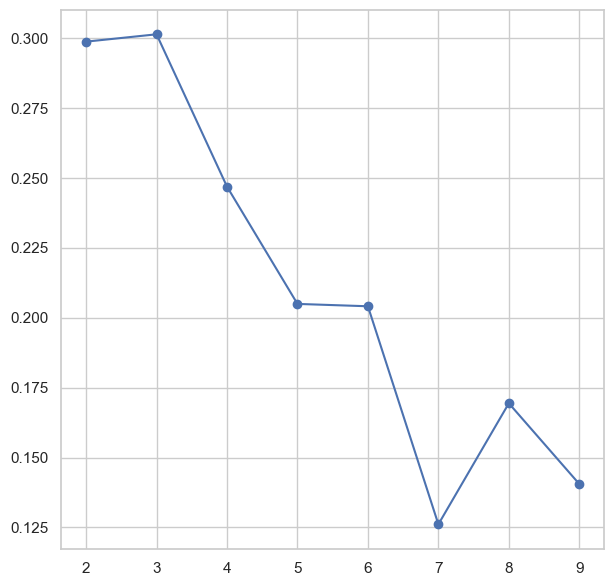

In [124]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_1)

clusters_range = range(2, 10, 1)
sil_scores = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(X)
    sil_scores.append(metrics.silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(7,7))
plt.plot(clusters_range,sil_scores, marker='o')

In [128]:
n_clusters = 3
random_state = 0

kmeans_1 = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)
dbscan_1 = DBSCAN(eps=0.5, min_samples=5).fit(X)
hierarchical_1 = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
gmm_1 = GaussianMixture(n_components=2).fit(X)
birch_1 = Birch(n_clusters=n_clusters).fit(X)
affinity_1 = AffinityPropagation(random_state=random_state).fit(X)

In [131]:
for model in (kmeans_1, dbscan_1, hierarchical_1, birch_1, affinity_1, gmm_1):
    if hasattr(model, 'labels_'):
        labels = model.labels_
    else:
        labels = model.predict(X)
    sil = metrics.silhouette_score(X, labels)
    print(sil)

0.3013463273503232
0.22552795030438744
0.2948290632158541
0.28105500463058747
0.11190109331193197
0.29824776909070244


## Dataset 2

In [140]:
df_2 = pd.read_csv("segmentation data.csv")
df_2

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [141]:
num_columns = ['ID', 'Age', 'Income']
cat_columns = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

df_2[cat_columns] = df_2[cat_columns].astype('str')

In [142]:
df_2.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


In [143]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


In [145]:
df_2.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [146]:
df_2 = df_2.drop(columns=num_columns)

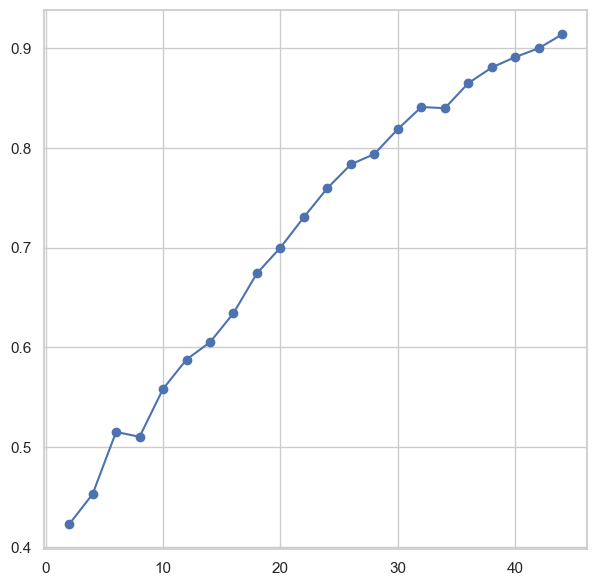

In [147]:
X = scaler.fit_transform(df_2)

clusters_range = range(2, 45, 2)
sil_scores = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(X)
    sil_scores.append(metrics.silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(7,7))
plt.plot(clusters_range,sil_scores, marker='o')

In [149]:
n_clusters = 40

kmeans_2 = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)
dbscan_2 = DBSCAN(eps=0.5, min_samples=5).fit(X)
hierarchical_2 = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
gmm_2 = GaussianMixture(n_components=n_clusters).fit(X)
birch_2 = Birch(n_clusters=n_clusters).fit(X)
affinity_2 = AffinityPropagation(damping=0.8, random_state=random_state).fit(X)

In [150]:
for model in (kmeans_2, dbscan_2, hierarchical_2, birch_2, affinity_2, gmm_2):
    if hasattr(model, 'labels_'):
        labels = model.labels_
    else:
        labels = model.predict(X)
    sil = metrics.silhouette_score(X, labels)
    print(sil)

0.891290605873337
0.45671208642807193
0.8926166026799867
0.515350742646277
0.7298036711973181
0.8742530469738207


## Dataset 3

In [151]:
df_3 = pd.read_csv("housing.csv")
df_3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [152]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [153]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [154]:
df_3 = df_3.drop(columns=['total_bedrooms'])

In [155]:
df_3.describe(include='object').T

,count,unique,top,freq
ocean_proximity,20640,5,<1H OCEAN,9136


In [157]:
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(handle_unknown='ignore')
ocean_encoded = onehot_enc.fit_transform(df_3['ocean_proximity'].values.reshape(-1, 1)).toarray()
onehot_enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [158]:
df_3_final = df_3.join(pd.DataFrame(ocean_encoded, columns=onehot_enc.categories_[0]))
df_3_final = df_3_final.drop(columns=['ocean_proximity', 'longitude', 'latitude'])
df_3_final.tail(2)

,housing_median_age,total_rooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20638,18.0,1860.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0
20639,16.0,2785.0,1387.0,530.0,2.3886,89400.0,0.0,1.0,0.0,0.0,0.0


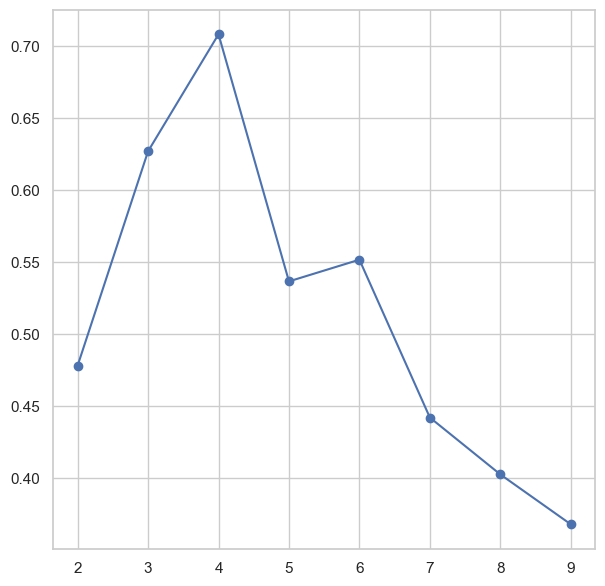

In [159]:
X = scaler.fit_transform(df_3_final)

clusters_range = range(2, 10, 1)
sil_scores = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(X)
    sil_scores.append(metrics.silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(7,7))
plt.plot(clusters_range,sil_scores, marker='o')

In [160]:
n_clusters = 4

kmeans_3 = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)
dbscan_3 = DBSCAN(eps=0.3, min_samples=5).fit(X)
hierarchical_3 = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
gmm_3 = GaussianMixture(n_components=n_clusters).fit(X)
birch_3 = Birch(n_clusters=n_clusters).fit(X)

In [162]:
# affinity_3 = AffinityPropagation(random_state=random_state).fit(X)   
#MemoryError: Unable to allocate 3.17 GiB for an array with shape (20640, 20640) and data type float64

In [164]:
for model in (kmeans_3, dbscan_3, hierarchical_3, birch_3, gmm_3):
    if hasattr(model, 'labels_'):
        labels = model.labels_
    else:
        labels = model.predict(X)
    sil = metrics.silhouette_score(X, labels)
    print(sil)

0.7080710044247879
0.7072471309389848
0.708056096839714
0.5671716960569932
0.7080728833774315
